<a href="https://colab.research.google.com/github/vivek6311/Artificial-Intelligence-with-Python/blob/master/Vivek_Kumar_Lab2_TLP23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Lab 1

## Assignment 2 (Deadline : 4/12/2022 11:59PM)

Total Points : 100

Your answers must be entered in LMS by midnight of the day it is due. 

If the question requires a textual response, you can create a PDF and upload that. 

The PDF might be generated from MS-WORD, LATEX, the image of a hand- written response, or using any other mechanism. 

Code must be uploaded and may require demonstration to the TA. 

Numbers in the parentheses indicate points allocated to the question. 

**Naming Convention**: FirstName_LastName_Lab2_TLP23.ipynb

# Question 1 (50 points)

## 1. Read the data into a numpy array

In [32]:
# Read data from file: 'data.csv'. 
import numpy as np 
import pandas as pd
#df = np.loadtxt('dataml.csv',  delimiter=", ", skiprows= 1)
#df
# Note that the first row has the number of inputs and number of outputs specified.
# For your reference: you can use "np.loadtxt".

In [33]:
df1= pd.read_csv('dataml.csv')
df1 = df1.reset_index()
df_np = df1.to_numpy()
df_np

array([[  51.87,   79.72, 1249.99],
       [ -30.66,  -15.64, -516.61],
       [ -57.57,   94.22,  312.09],
       ...,
       [ -18.6 ,   32.61,  -45.14],
       [ -38.31,   77.81,  -20.13],
       [ -38.33,   45.69, -460.47]])

In [34]:
#from google.colab import drive
#drive.mount('/content/drive')

In [35]:
x1= df_np[:, [0]]
print(x1)
x=df_np[:, [0,1]]
print(x)
x2= df_np[:, [1]]
print(x2)
y= df_np[:,[2]]
print(y)

[[ 51.87]
 [-30.66]
 [-57.57]
 ...
 [-18.6 ]
 [-38.31]
 [-38.33]]
[[ 51.87  79.72]
 [-30.66 -15.64]
 [-57.57  94.22]
 ...
 [-18.6   32.61]
 [-38.31  77.81]
 [-38.33  45.69]]
[[ 79.72]
 [-15.64]
 [ 94.22]
 ...
 [ 32.61]
 [ 77.81]
 [ 45.69]]
[[1249.99]
 [-516.61]
 [ 312.09]
 ...
 [ -45.14]
 [ -20.13]
 [-460.47]]


## 2. Plot and explore the data to get a better understanding

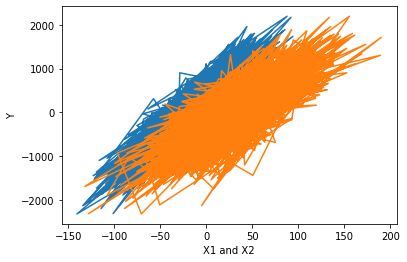

In [36]:
# EDA
import matplotlib.pyplot as plt
plt.xlabel("X1 and X2")
plt.ylabel("Y")
plt.plot(x1,y)
plt.plot(x2,y)

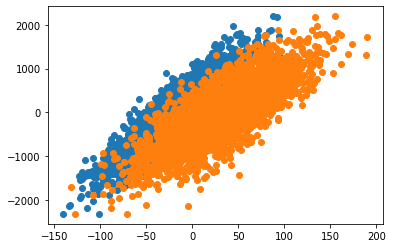

In [37]:
plt.scatter(x1,y)
plt.scatter(x2,y)

## 3. Prepare the data for modelling

In [38]:
# Separate the data: input and output.
input_data=x
output_data= y

In [39]:
# Perform a train-val-test split of 60-20-20.
from sklearn.model_selection import train_test_split
train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20
random_state=42
x_train_val, x_test, y_train_val, y_test = train_test_split(input_data, output_data, test_size=0.20)

# test is now 20% of the initial data set
# validation is now 20% of the initial data set
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25) 
#print(x_train, x_val, x_test)
# Use "random_state=42".
# For your reference: you can use "train_test_split" from sklearn twice to perform this. 

 * From your understanding of the dataset, is stratified sampling necessary in this case? Why / Why not?


From the plot of the it seems like data is moreover homogeneous meaning taking any sample at random should give similar result. Hence, Startified sampling is not necessary in this case. 

## 4. Modelling

### 4.1 Linear Regression

In [77]:
# Implement Linear Regression.
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns
# Use both train and val data for training purpose.
regr = linear_model.LinearRegression()
regr.fit(x_train_val, y_train_val)
LinearRegression()
print(regr.coef_)
# Make preditions on both training(train+val) and test data.
#print(regr.score(x_test,y_test))
regr.score(x_train_val, y_train_val)
#sns.regplot(x=x_train_val, y=y_train_val,ci=None,color ='red')

[[12.86923452  6.95280276]]


0.9490719147980439

In [41]:
regr.predict(x_test)

array([[-3.28881642e+01],
       [-2.19719072e+02],
       [ 3.87152960e+02],
       [-1.42015544e+02],
       [-2.54428134e+02],
       [-1.01247488e+03],
       [-6.57465480e+02],
       [ 5.67065152e+02],
       [-3.27414686e+02],
       [ 3.19880992e+00],
       [ 5.12557054e+02],
       [ 9.52533390e+02],
       [ 1.18519441e+03],
       [-4.50318600e+02],
       [-1.79513338e+01],
       [ 7.48907120e+02],
       [-5.64386135e+02],
       [ 1.32700950e+02],
       [-1.00917059e+02],
       [ 6.44521262e+02],
       [-7.34344418e+02],
       [-6.33826974e+01],
       [-2.92506262e+02],
       [ 2.82013777e+02],
       [-6.92092031e+02],
       [ 6.75900146e+02],
       [ 2.72357356e+02],
       [ 2.79763675e+01],
       [-2.22983500e+01],
       [-2.10191541e+02],
       [-5.50296540e+02],
       [ 5.58756426e+01],
       [-2.76180576e+02],
       [-1.39414561e+03],
       [ 3.40362316e+02],
       [-3.92470399e+02],
       [-1.13105091e+03],
       [-5.01318975e+02],
       [ 7.3

### 4.2 Ridge Reegression

In [82]:
# Implement Ridge Regression.
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)

# Fit the model to the data
model.fit(x_train_val, y_train_val)

# Predict target values for the input data
y_pred = model.predict(x_test)
print(y_pred)
print(model.score(x_test, y_test))

# Perform cross validation to find a good value for your hyper-parameter.

# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.


Ridge()

### 4.3 Lasso Regression

In [43]:
# Implement Lasso Regression.
from sklearn.linear_model import Lasso

# Create the model
model = Lasso(alpha=1.0)

# Fit the model to the data
model.fit(x_train_val, y_train_val)

# Predict target values for the input data
y_pred = model.predict(x_test)
print(model.score(x_test, y_test))
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.

0.9444648136832293


### 4.4 ElasticNet Regression

In [44]:
# Implement ElasticNet Regression.
from sklearn.linear_model import ElasticNet
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
# define model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, input_data, output_data, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
# Perform cross validation to find a good value for your hyper-parameters.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.

Mean MAE: 120.460 (5.442)


## 5. Analysis

In [45]:
# Write down the actual value along with the preditions from all the regression models, for the first 10 points in test data.

In [46]:
# Find both RMSE and MAE for all the regression models on both training(train+val) and testing data.

## 6. Final Observations
Write down your final conclusions and observations

The data set given to us has very low error point as the regression line fits very well. In all the three regrssions the accuracy is coming above 90%. 

# Question 2 (30 points)

Given the automobile dataset at https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv , 

## 1. Load and examine the dataset

In [47]:
import pandas as pd
url="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv"
data= pd.read_csv(url)
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [48]:
data.fillna(0)
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
data['data_aspiration'] = pd.DataFrame(ord_enc.fit_transform(data[["aspiration"]]))
data['data_doors'] = pd.DataFrame(ord_enc.fit_transform(data[["num-of-doors"]]))
data['data_style'] = pd.DataFrame(ord_enc.fit_transform(data[["body-style"]]))
data['data_wheels'] = pd.DataFrame(ord_enc.fit_transform(data[["drive-wheels"]]))
data['data_engine'] = pd.DataFrame(ord_enc.fit_transform(data[["engine-location"]]))
data['data_engine_type'] = pd.DataFrame(ord_enc.fit_transform(data[["engine-type"]]))
data['data_cylinder'] = pd.DataFrame(ord_enc.fit_transform(data[["num-of-cylinders"]]))
data['data_fuel'] = pd.DataFrame(ord_enc.fit_transform(data[["fuel-system"]]))
data['data_horsepower'] = pd.DataFrame(ord_enc.fit_transform(data[["horsepower-binned"]]))

In [49]:
data.drop(data.columns[[0,1,2,3,4,5,6,7,13,14,16,23,24,25,26]], axis=1, inplace=True)

In [50]:
import numpy as np
Target = data['city-mpg'].copy()
data.drop(['city-mpg'],axis=1,inplace=True)
Input = data.copy()
Input = Input.replace(np.nan, 0)
Target

0      21
1      21
2      19
3      24
4      18
       ..
196    23
197    19
198    18
199    26
200    19
Name: city-mpg, Length: 201, dtype: int64

## 2. Visualise/Plot the regression model

0.8750467293412157
0.9045497791116032
Coefficients:  [-3.91314685e-02 -3.79363984e+01  1.53934641e+01  1.35437382e-01
 -5.38065284e-03  3.89465863e-02 -1.77923602e-01  1.42281506e+00
  1.79003406e+00 -8.35348922e-02 -1.22565319e-03 -9.85839099e+00
  9.85839099e+00  1.68138714e+00  3.19118745e-02  6.58835196e-01
  6.61443824e-01 -9.02493163e-01 -5.94713705e-01  5.73825710e-02
 -9.97806572e-03 -9.18619335e-01]
Variance score: 0.9045497791116032


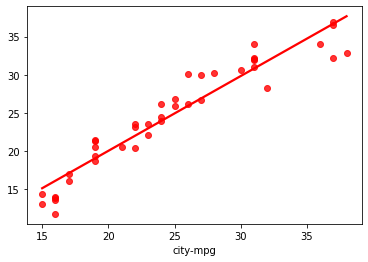

In [51]:
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import linear_model,metrics
from sklearn.metrics import r2_score
reg = linear_model.LinearRegression()
import seaborn as sns
x_train,x_test,y_train,y_test = train_test_split(Input,Target, test_size=0.2,random_state=42)
reg.fit(x_train, y_train)
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))
print('Coefficients: ', reg.coef_)
print('Variance score: {}'.format(reg.score(x_test, y_test)))
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red')

## 3. Generate a Linear Regression equation

In [52]:
# Implement Linear Regression.
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Use both train and val data for training purpose.
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
LinearRegression()
print(regr.coef_)
# Make preditions on both training(train+val) and test data.
print(regr.score(x_test,y_test))
regr.score(x_train, y_train)

[-3.91314685e-02 -3.79363984e+01  1.53934641e+01  1.35437382e-01
 -5.38065284e-03  3.89465863e-02 -1.77923602e-01  1.42281506e+00
  1.79003406e+00 -8.35348922e-02 -1.22565319e-03 -9.85839099e+00
  9.85839099e+00  1.68138714e+00  3.19118745e-02  6.58835196e-01
  6.61443824e-01 -9.02493163e-01 -5.94713705e-01  5.73825710e-02
 -9.97806572e-03 -9.18619335e-01]
0.9045497791116032


0.8750467293412157

## 4. Use a residual plot to inspect if LR fits the model

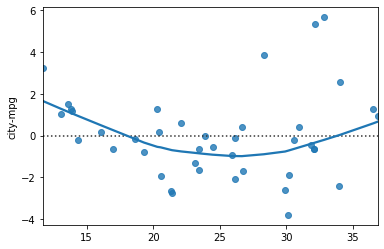

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
# draw residplot
# with lowess = True
#sns.residplot(x_train, y_train, lowess = True)
y_pred = reg.predict(x_test)
sns.residplot(x=y_pred, y=y_test, lowess=True)
# show the plot
plt.show()

## 5. Use R2 and MSE to determine the accuracy of the LR fit 

In [54]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred, squared=False)
print(MSE)
r2_score = regr.score(x_test, y_test)
print(r2_score)

2.0909804616830185
0.9045497791116032


# Question 3 (20 points)

### In this assignment, you will experiment with a toy dataset – the Iris dataset.

## 1. Load the Iris dataset.

In [64]:
from sklearn.datasets import load_iris
 #use -  sklearn.datasets.load_iris
data= load_iris()
data.target
#data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 2. The Iris data has 3 classes. For the purpose of this assignment, you will modify it such that it has two classes – specifically, you will merge the “setosa” and “versicolor” classes.

In [56]:
for i in range(len(data.target)):
  if (data.target[i] ==2):
    data.target[i] = 2
  else :
    data.target[i] = 1
print(data.target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 3. Construct a training set and a testing set using 80-20 split using random sampling.

In [65]:
import numpy as np
import pandas as pd
y=data.target
x=data.data
#print(x)

## 4. Use Logistic Regression as a black box classifier and assess the performance.

In [67]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(x, y)

# Predicting the Test set results
y_pred = classifier.predict(x)
print(y_pred)
# Predict probabilities
probs_y=classifier.predict_proba(x)
#print(probs_y)
#fig = plt.figure(figsize=(14, 8))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
data.target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
data = np.column_stack([x,y]) 
df = pd.DataFrame(data, columns =['A', 'B', 'C','D','E'])
df

,A,B,C,D,E
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,1.0
3,4.6,3.1,1.5,0.2,1.0
4,5.0,3.6,1.4,0.2,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## 5. Implement stratified sampling, again using the 80-20 split. Decide the stratification variable and explain your choice.

In [61]:
#Stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['E']):
    strat_train_data = df.loc[train_index]
    strat_test_data = df.loc[test_index]
#print(strat_test_data)

## 6. Re-assess the performance. Comment on any changes from the random sampling case. If there is no significant change, comment on why or why not?

In [68]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(x, y)

# Predicting the Test set results
y_pred = classifier.predict(x)
print(y_pred)
# Predict probabilities
probs_y=classifier.predict_proba(x)
#print(probs_y)
fig = plt.figure(figsize=(14, 8))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 1008x576 with 0 Axes>